# Curve for different learning rate

This notebook display the evolution of the loss function of different methods.

## Import

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Switcher

In [2]:
class CSV():
    def __init__(self):
        self.switch = {}
        self.list_name = []
        self.min = 10
    
    def set(self, name:str):
        nom = name.split('.')
        if nom[1]=='csv':
            kappa = nom[0].split('/')[-1]
            self.switch[kappa] = pd.read_csv(name)
            self.list_name.append(kappa)
            search = list(pd.read_csv(name)['Value'])
            search.append(self.min)
            self.min = min(search)

## Reading

In [3]:
number = str(input("Please enter the folder you want to analyse : "))
path = os.path.join("/home/julien/traineeship/curve/{}".format(number))
csv = CSV()
csv_name = os.listdir(path)

for name in csv_name:
    csv.set(os.path.join(path, name))

Please enter the folder you want to analyse :  ribbon_e-1_mom


## Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


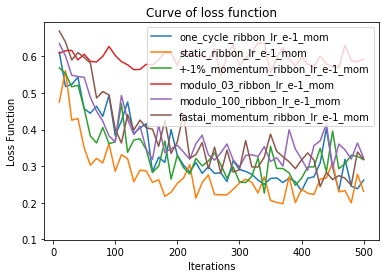

In [4]:
plt.figure()
for lab in csv.list_name:
    plt.plot(csv.switch.get(lab)['Step'], csv.switch.get(lab)['Value'], label=lab)
plt.title("Curve of loss function")
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.legend()
plt.ylim(ymin=csv.min/2)
plt.savefig(os.path.join(path, "fig.eps"))